In [67]:
# Importando librerias para el proceso 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualisation
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError


from sklearn.feature_selection import SelectKBest, f_classif
from keras.callbacks import EarlyStopping
from keras import regularizers

In [45]:
data = pd.read_csv('trainReg.csv')
data.describe()

,ID,Y,V1,V2,V3,V4,V5,V6,V7,V8,...,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90
count,77779.000000,77779.000000,77779.000000,77779.000000,77779.0,77779.000000,77779.000000,77779.000000,77779.000000,77779.000000,...,77779.000000,77779.000000,77779.000000,77779.000000,77779.000000,77779.000000,77779.000000,77779.000000,77779.000000,77779.000000
mean,48244.238342,2002.308129,43.425185,-0.136720,0.0,3.755313,-2.339768,-1.643095,-6.814997,-9.587264,...,15.717215,-71.733008,41.679287,37.816353,0.328213,17.575097,-25.628857,4.463484,18.664885,1.240194
std,27846.283673,10.811038,6.128869,4.370466,0.0,17.609183,14.483975,7.898574,22.980515,12.911914,...,32.211995,176.893351,123.523393,95.335357,16.272689,115.243644,173.310304,13.526414,186.690183,22.379654
min,1.000000,1926.000000,4.836880,-69.680870,0.0,-165.221610,-121.475340,-72.503850,-152.407550,-70.693420,...,-424.517570,-4402.376440,-1733.722110,-1848.702260,-238.386730,-3168.924570,-4319.992320,-236.039260,-7458.378150,-281.150600
25%,24079.500000,1998.000000,40.060315,-2.612435,0.0,-7.016240,-10.685075,-6.300690,-21.265305,-18.583065,...,-1.968265,-136.511095,-21.467975,-4.604295,-6.702370,-31.569390,-100.668480,-2.569360,-60.121980,-8.900120
50%,48357.000000,2006.000000,44.323850,-0.063000,0.0,2.022100,-2.054560,-1.586240,-6.307610,-11.238330,...,9.079980,-51.322570,28.217560,33.417370,0.788980,15.237360,-21.581640,3.136900,5.941490,-0.095340
75%,72340.500000,2010.000000,47.900080,2.465950,0.0,12.776450,6.423900,3.077055,7.617995,-2.329330,...,26.211700,13.999870,89.190475,77.216175,8.354270,67.361475,51.333150,10.002145,84.389125,9.520700
max,96435.000000,2014.000000,60.034010,23.815260,0.0,274.658580,160.815220,68.447960,262.068870,112.971410,...,840.973380,2147.942140,3210.701700,1482.642140,199.121500,2144.103910,2833.608950,275.353660,5289.111380,600.766240


In [46]:
data.columns

Index(['ID', 'Y', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30',
       'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40',
       'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50',
       'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60',
       'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70',
       'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80',
       'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90'],
      dtype='object')

In [47]:
nsongs = {}
anios_datos = 0
for y in range(1926,2014):
    if len(data[data.Y==y])!= 0 :
        nsongs[y] = len(data[data.Y==y])
        print ("Year=%d, nsongs=%d" % (y, nsongs[y]))
        anios_datos+=1
print('Años con informaicón:', anios_datos)


Year=1926, nsongs=1
Year=1932, nsongs=7
Year=1933, nsongs=18
Year=1934, nsongs=1
Year=1935, nsongs=20
Year=1943, nsongs=1
Year=1944, nsongs=1
Year=1946, nsongs=1
Year=1948, nsongs=2
Year=1949, nsongs=8
Year=1950, nsongs=1
Year=1951, nsongs=8
Year=1952, nsongs=5
Year=1953, nsongs=14
Year=1954, nsongs=7
Year=1956, nsongs=11
Year=1957, nsongs=15
Year=1958, nsongs=14
Year=1959, nsongs=51
Year=1960, nsongs=106
Year=1961, nsongs=105
Year=1962, nsongs=109
Year=1963, nsongs=58
Year=1964, nsongs=99
Year=1965, nsongs=55
Year=1966, nsongs=103
Year=1967, nsongs=158
Year=1968, nsongs=145
Year=1969, nsongs=164
Year=1970, nsongs=228
Year=1971, nsongs=248
Year=1972, nsongs=327
Year=1973, nsongs=301
Year=1974, nsongs=253
Year=1975, nsongs=281
Year=1976, nsongs=310
Year=1977, nsongs=376
Year=1978, nsongs=264
Year=1979, nsongs=379
Year=1980, nsongs=362
Year=1981, nsongs=411
Year=1982, nsongs=453
Year=1983, nsongs=537
Year=1984, nsongs=424
Year=1985, nsongs=494
Year=1986, nsongs=555
Year=1987, nsongs=618


Text(0, 0.5, 'Cantidad Canciones')

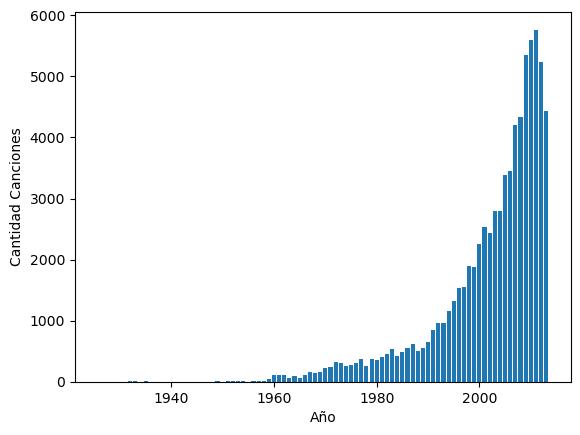

In [48]:
yrs = nsongs.keys()
values = [nsongs[y] for y in yrs]
plt.bar(yrs, values, align='center')
plt.xlabel("Año")
plt.ylabel("Cantidad Canciones")

In [28]:
data.corr

<bound method DataFrame.corr of           ID     Y        V1       V2  V3        V4        V5       V6  \
0          1  2013  44.81144  0.83826   0   7.91314  10.94148 -0.04547   
1          2  1998  41.99180  7.99976   0  64.26707  16.54115 -9.28737   
2          3  1998  42.19196  2.23111   0  65.07719  24.99746  1.76100   
3          4  1998  39.28634 -1.85716   0  91.04190   9.08333  0.08502   
4          5  1998  40.36025  2.94918   0  53.83723  13.71369 -8.21964   
...      ...   ...       ...      ...  ..       ...       ...      ...   
77774  96428  2004  33.76706 -3.80678   0  -1.44169  23.78801  5.01781   
77775  96432  2004  25.77805  2.41861   0   5.96418  -8.43658 -1.36182   
77776  96433  2004  24.78656  1.36415   0  34.13329  34.32996 -0.95170   
77777  96434  2006  39.67698  3.65167   0  34.04925  -0.68467 -2.13911   
77778  96435  2006  44.44499  8.89481   0  48.99411  15.83343  5.00566   

             V7        V8  ...       V81        V82        V83        V84  \
0 

In [49]:
# Dividir los datos en características (X) y etiquetas (Y)
X = data.drop(['ID', 'Y', 'V3'], axis=1)
Y = data['Y']


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


# Estandarizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


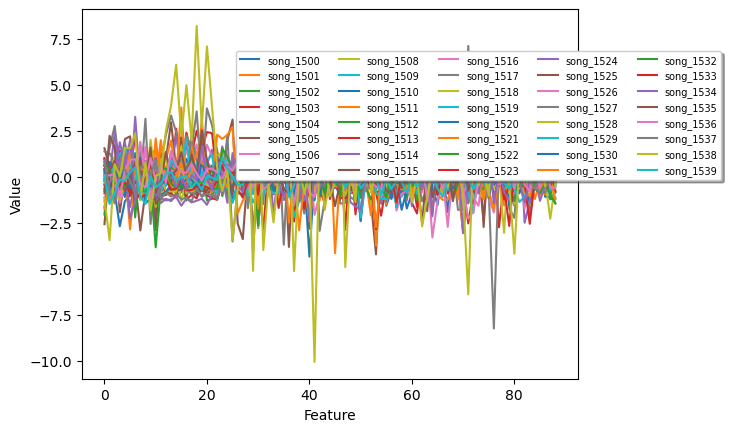

In [30]:
for i in range(1500, 1540):
    plt.plot(X_train[i], label='song_' + str(i))
    
plt.xlabel("Feature")
plt.ylabel("Value")
plt.legend(loc='upper center', bbox_to_anchor=(0.8, 0.9), ncol=5, fancybox=True, shadow=True, fontsize=7)

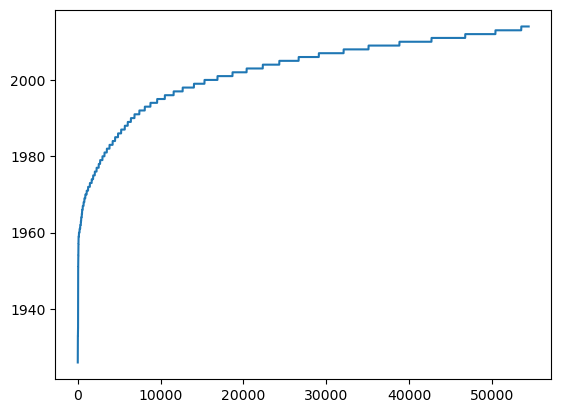

In [31]:
plt.plot(sorted(Y_train))

In [58]:
# Selección de características
selector = SelectKBest(score_func=f_classif, k=10)
X_train = selector.fit_transform(X_train, Y_train)
X_test = selector.transform(X_test)


In [66]:
# Crear la red neuronal
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

# Compilar el modelo
model.compile(loss='mean_squared_error', optimizer='adam',  metrics=[RootMeanSquaredError()])

# Implementar early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

# Entrenar el modelo
model.fit(X_train, Y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1, callbacks=[es])

# Evaluar el modelo
model.evaluate(X_test, Y_test, verbose=1)


Epoch 1/100
1362/1362 [==============================] - 4s 2ms/step - loss: 1985127.0000 - root_mean_squared_error: 1408.9453 - val_loss: 384991.3750 - val_root_mean_squared_error: 620.4767
Epoch 2/100
1362/1362 [==============================] - 2s 2ms/step - loss: 196634.8438 - root_mean_squared_error: 443.4353 - val_loss: 91943.0078 - val_root_mean_squared_error: 303.2211
Epoch 3/100
1362/1362 [==============================] - 3s 2ms/step - loss: 44632.3398 - root_mean_squared_error: 211.2637 - val_loss: 22584.2656 - val_root_mean_squared_error: 150.2806
Epoch 4/100
1362/1362 [==============================] - 3s 2ms/step - loss: 11419.2148 - root_mean_squared_error: 106.8607 - val_loss: 7123.7769 - val_root_mean_squared_error: 84.4025
Epoch 5/100
1362/1362 [==============================] - 2s 2ms/step - loss: 3564.4209 - root_mean_squared_error: 59.7028 - val_loss: 2707.1458 - val_root_mean_squared_error: 52.0302
Epoch 6/100
1362/1362 [==============================] - 3s 2ms/st

[118.74050903320312, 10.896811485290527]

In [96]:
# Define Reunoral network
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))


# Compile the model
model.compile(loss=MeanSquaredError(), optimizer='RMSprop', metrics=[RootMeanSquaredError()])

# Train the model
model.fit(X_train, Y_train, epochs=10, batch_size=20, validation_split=0.2)


# Evaluate the model
resultado = model.evaluate(X_test, Y_test, return_dict=True)

Epoch 1/10
2178/2178 [==============================] - 3s 1ms/step - loss: 609056.1875 - root_mean_squared_error: 780.4205 - val_loss: 2245.5103 - val_root_mean_squared_error: 47.3868
Epoch 2/10
2178/2178 [==============================] - 2s 1ms/step - loss: 450.3275 - root_mean_squared_error: 21.2209 - val_loss: 272.8729 - val_root_mean_squared_error: 16.5189
Epoch 3/10
2178/2178 [==============================] - 2s 1ms/step - loss: 176.8338 - root_mean_squared_error: 13.2979 - val_loss: 192.8914 - val_root_mean_squared_error: 13.8885
Epoch 4/10
2178/2178 [==============================] - 2s 1ms/step - loss: 158.1266 - root_mean_squared_error: 12.5748 - val_loss: 444.3452 - val_root_mean_squared_error: 21.0795
Epoch 5/10
2178/2178 [==============================] - 2s 1ms/step - loss: 153.9987 - root_mean_squared_error: 12.4096 - val_loss: 126.6771 - val_root_mean_squared_error: 11.2551
Epoch 6/10
2178/2178 [==============================] - 2s 1ms/step - loss: 150.1474 - root_mea

In [103]:
resultado.get('root_mean_squared_error')

14.016508102416992

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model1 = Sequential()
model1.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l1(0.01)))
model1.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.01)))
model1.add(Dense(1, activation='linear'))

model2 = Sequential()
model2.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l1(0.001)))
model2.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model2.add(Dense(1, activation='linear'))


model3 = Sequential()
model3.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(1, activation='linear'))



# Entrenar el modelo con early stopping para evitar sobreajuste
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Compilar el modelo con RMSE como métrica
model.compile(optimizer=Adam(), loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])
model1.compile(optimizer=Adam(), loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])
model2.compile(optimizer=Adam(), loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])
model3.compile(optimizer=Adam(), loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])


batch_size_p =32
epochs_p= 50


history=model.fit(X_train, Y_test, batch_size=batch_size_p, epochs=epochs_p)
history1=model1.fit(X_train, Y_test, batch_size=batch_size_p, epochs=epochs_p)
history2=model2.fit(X_train, Y_test, batch_size=batch_size_p, epochs=epochs_p)
history3=model3.fit(X_train, Y_test, batch_size=batch_size_p, epochs=epochs_p, callbacks=[es])


# Evaluate the model
print('Modelo:', model.evaluate(X_test, Y_test, return_dict=True))
print('Modelo1:', model1.evaluate(X_test, Y_test, return_dict=True))
print('Modelo2:', model2.evaluate(X_test, Y_test, return_dict=True))
print('Modelo3:', model3.evaluate(X_test, Y_test, return_dict=True))
        

In [116]:
# Define Reunoral network
# Implementar early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

def optimizar(epocas, optimizador, batch_sz):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='linear'))


    # Compile the model
    model.compile(loss=MeanSquaredError(), optimizer=optimizador, metrics=[RootMeanSquaredError()])

    # Train the model
    model.fit(X_train, Y_train, epochs=epocas, batch_size=batch_sz, validation_split=0.2, verbose=1, callbacks=[es])


    # Evaluate the model
    resultado = model.evaluate(X_test, Y_test, return_dict=True)

    return epocas, optimizador, resultado.get('root_mean_squared_error'), batch_sz



    

In [117]:
resultado = list()

epocas = [10,50, 100]
optimizador= ['RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
batch_size = [10, 20, 30, 40]


for o in optimizador:
    for e in epocas:
        for b in batch_size:
            ret = optimizar(e, o, b)
            resultado.append([ret])


Epoch 1/10
4356/4356 [==============================] - 5s 1ms/step - loss: 372096.5000 - root_mean_squared_error: 609.9971 - val_loss: 628.1879 - val_root_mean_squared_error: 25.0637
Epoch 2/10
4356/4356 [==============================] - 5s 1ms/step - loss: 234.5783 - root_mean_squared_error: 15.3159 - val_loss: 452.2022 - val_root_mean_squared_error: 21.2650
Epoch 3/10
4356/4356 [==============================] - 4s 1ms/step - loss: 166.6346 - root_mean_squared_error: 12.9087 - val_loss: 317.1842 - val_root_mean_squared_error: 17.8097
Epoch 4/10
4356/4356 [==============================] - 4s 1ms/step - loss: 158.0424 - root_mean_squared_error: 12.5715 - val_loss: 167.8213 - val_root_mean_squared_error: 12.9546
Epoch 5/10
4356/4356 [==============================] - 5s 1ms/step - loss: 155.6116 - root_mean_squared_error: 12.4744 - val_loss: 111.9541 - val_root_mean_squared_error: 10.5808
Epoch 6/10
4356/4356 [==============================] - 4s 1ms/step - loss: 154.0227 - root_mean

In [118]:
resultado

[[(10, 'RMSprop', 13.29434871673584, 10)],
 [(10, 'RMSprop', 13.32201862335205, 20)],
 [(10, 'RMSprop', 11.490873336791992, 30)],
 [(10, 'RMSprop', 12.240002632141113, 40)],
 [(50, 'RMSprop', 18.758560180664062, 10)],
 [(50, 'RMSprop', 11.903471946716309, 20)],
 [(50, 'RMSprop', 15.393881797790527, 30)],
 [(50, 'RMSprop', 13.307558059692383, 40)],
 [(100, 'RMSprop', 12.381111145019531, 10)],
 [(100, 'RMSprop', 11.78740406036377, 20)],
 [(100, 'RMSprop', 11.803832054138184, 30)],
 [(100, 'RMSprop', 12.352411270141602, 40)],
 [(10, 'Adagrad', 743.1677856445312, 10)],
 [(10, 'Adagrad', 1310.3353271484375, 20)],
 [(10, 'Adagrad', 1401.26416015625, 30)],
 [(10, 'Adagrad', 1625.7132568359375, 40)],
 [(50, 'Adagrad', 361.2513122558594, 10)],
 [(50, 'Adagrad', 528.2493896484375, 20)],
 [(50, 'Adagrad', 620.342041015625, 30)],
 [(50, 'Adagrad', 683.774658203125, 40)],
 [(100, 'Adagrad', 232.475830078125, 10)],
 [(100, 'Adagrad', 362.8125305175781, 20)],
 [(100, 'Adagrad', 458.7627258300781, 30)

In [121]:
# Flatten the list of tuples
flattened_data = [item for sublist in resultado for item in sublist]

# Convert the flattened data into a DataFrame
df = pd.DataFrame(flattened_data, columns=['Value1', 'Value2', 'Value3', 'Value4'])

# Order the DataFrame by the third position (Value3) in ascending order
df_sorted = df.sort_values(by='Value3', ascending=True)

df_sorted

,Value1,Value2,Value3,Value4
32,100,Adadelta,9.980865,10
71,100,Nadam,10.862849,40
67,50,Nadam,10.879791,40
47,100,Adam,10.893071,40
52,50,Adamax,10.960761,10
...,...,...,...,...
12,10,Adagrad,743.167786,10
27,10,Adadelta,1183.454224,40
13,10,Adagrad,1310.335327,20
14,10,Adagrad,1401.264160,30
